In [1]:
import seaborn as sns
import pandas as pd
import numpy as num
import matplotlib.pyplot as plt

In [2]:
fb_df=pd.read_csv('D:\Courses\курсы\GoIT_DA\Блок 4\HW5\sbook_ads_data.csv')
print(fb_df.head())

      ad_date campaign_name  total_spend  total_impressions  total_clicks  \
0  2022-11-05     Expansion         0.00                  0             0   
1  2022-11-01     Expansion         0.00                  0             0   
2  2022-10-31     Expansion       227.45               6054            58   
3  2022-10-30     Expansion       335.91              27562            69   
4  2022-10-29     Expansion       714.03              33358           115   

   total_value   cpc    cpm       ctr      romi  
0         0.00   NaN    NaN       NaN       NaN  
1         0.00   NaN    NaN       NaN       NaN  
2       191.87  3.92  37.57  0.009580  0.843570  
3       472.61  4.87  12.19  0.002503  1.406954  
4       680.34  6.21  21.41  0.003447  0.952817  


In [4]:
fb_df['Date'] = pd.to_datetime(fb_df['ad_date'])
start_date = '2021-01-01'
end_date = '2021-12-31'
filtered_df = fb_df[(fb_df['ad_date'] >= start_date) & (fb_df['ad_date'] <= end_date)]
grouped_df = filtered_df.groupby('ad_date').sum().reset_index()
print(grouped_df)

        ad_date  total_spend  total_impressions  total_clicks  total_value  \
0    2021-01-01         0.39                353             0         0.59   
1    2021-01-02         7.74              10709           205         6.90   
2    2021-01-04        70.06              22440          1256        68.47   
3    2021-01-05        81.15              60232          1379        61.68   
4    2021-01-06       142.77              65265           431       145.97   
..          ...          ...                ...           ...          ...   
324  2021-12-27       478.31             103725           504       686.47   
325  2021-12-28       359.83             101788           499       450.47   
326  2021-12-29       163.25              32290           435       171.76   
327  2021-12-30       285.67              64171           984       330.26   
328  2021-12-31       173.38              56749           281       183.11   

      cpc    cpm       ctr      romi  
0    0.00   1.10  0.0000

C:\Users\Acer\AppData\Local\Temp\ipykernel_9568\821538299.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = filtered_df.groupby('ad_date').sum().reset_index()


1.1 Графік з щоденною сумою витрат на рекламу в 2021 році;

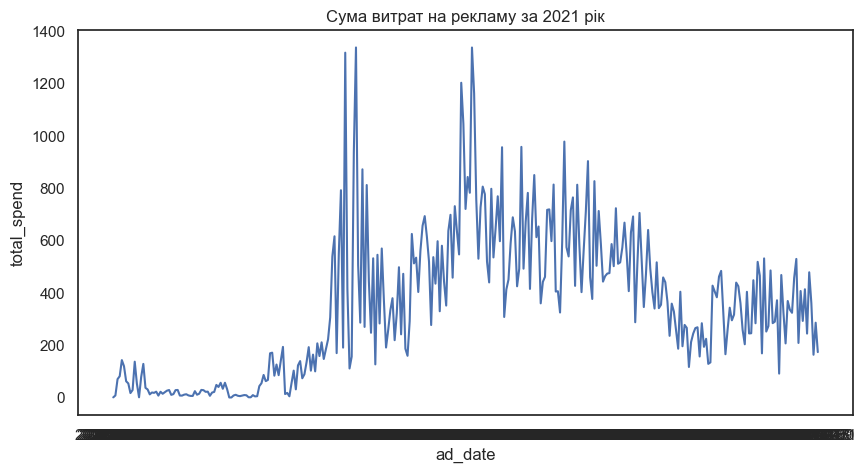

In [5]:
sns.set(style="white")
plt.figure(figsize=(10, 5))
sns.lineplot(x='ad_date', y='total_spend', data=grouped_df)
plt.title('Сума витрат на рекламу за 2021 рік')
plt.show()

1.2 Графік з щоденним ROMI в 2021 році.

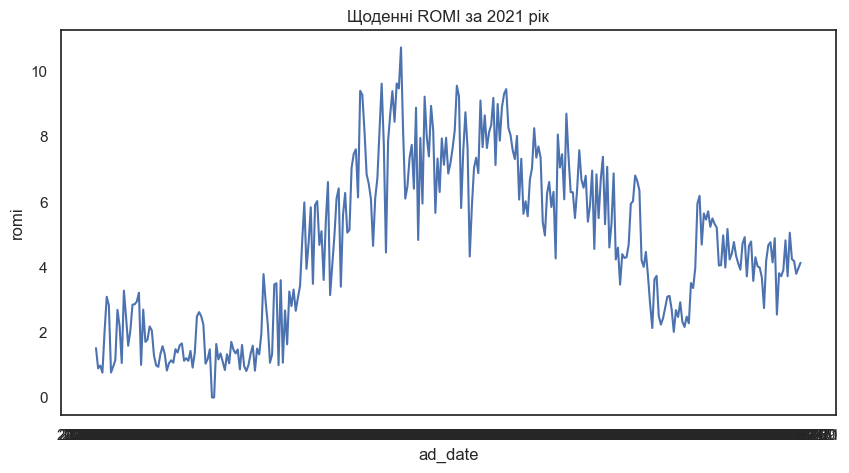

In [45]:
sns.set(style="white")
plt.figure(figsize=(10, 5))
sns.lineplot(x='ad_date', y='romi', data=grouped_df)
plt.title('Щоденні ROMI за 2021 рік')
plt.show()

2.1. Графік загальної суми витрат на рекламу в кожній з кампаній;

C:\Users\Acer\AppData\Local\Temp\ipykernel_4140\2808754196.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  camp_df= fb_df.groupby('campaign_name').sum().reset_index()


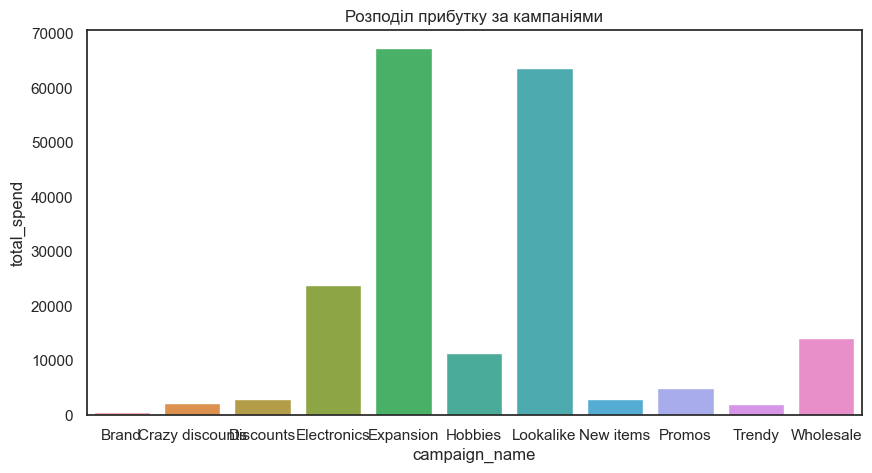

In [46]:
camp_df= fb_df.groupby('campaign_name').sum().reset_index()
#print(camp_df.columns)
sns.set(style="white")
plt.figure(figsize=(10, 5))
sns.barplot(x='campaign_name', y='total_spend', data=camp_df)
plt.title('Розподіл прибутку за кампаніями')
plt.show()

2.2. Загальний ROMI в кожній з кампаній.

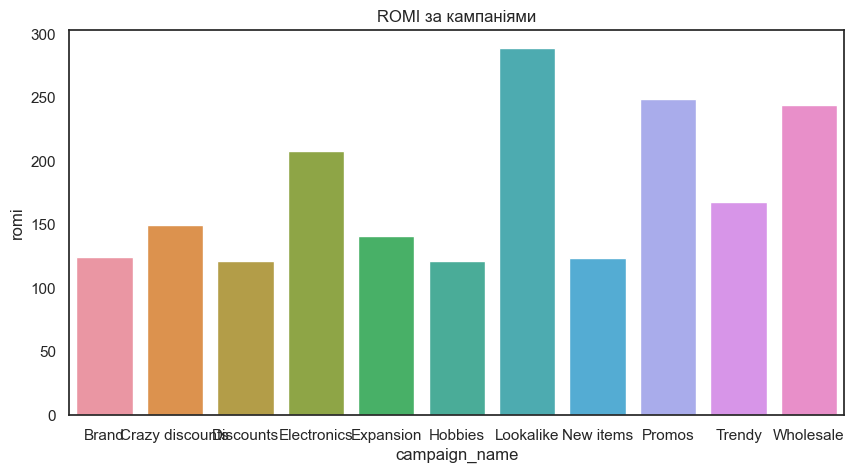

In [47]:
sns.set(style="white")
plt.figure(figsize=(10, 5))
sns.barplot(x='campaign_name', y='romi', data=camp_df)
plt.title('ROMI за кампаніями')
plt.show()

3. За допомогою box plot визнач, яким був розкид щоденного ROMI в кожній кампаній (за назвою кампанії.)

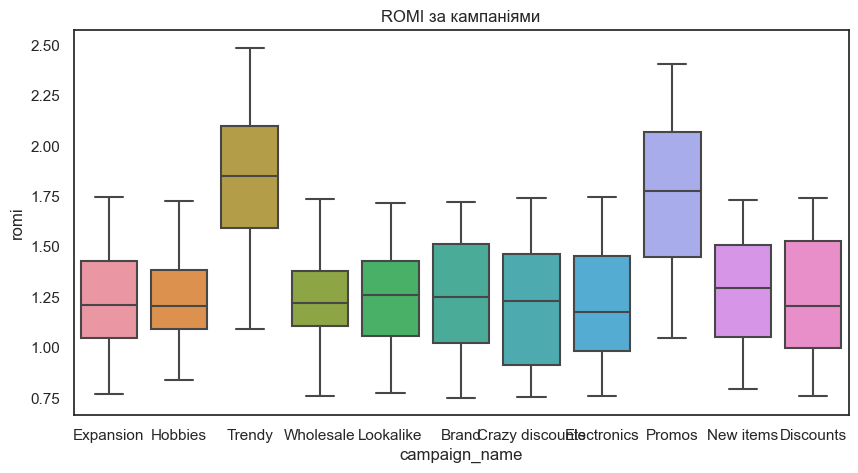

In [55]:
sns.set(style="white")
plt.figure(figsize=(10, 5))
sns.boxplot(x='campaign_name', y='romi', data=fb_df)
plt.title('ROMI за кампаніями')
plt.show()

4. Побудуй гістограму з розподілом значень ROMI в таблиці facebook_ads_data.csv

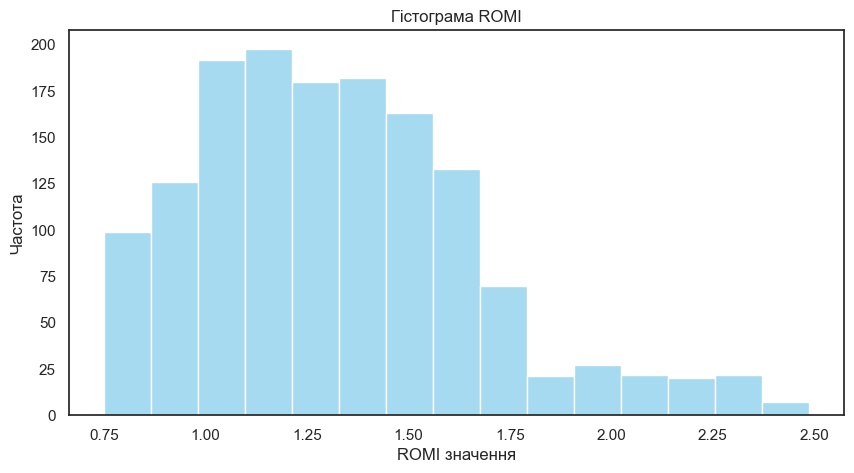

In [58]:
sns.set(style="white")
plt.figure(figsize=(10, 5))
sns.histplot(fb_df['romi'], bins=15, kde=False, color='skyblue')
plt.title('Гістограма ROMI')
plt.xlabel('ROMI значення')
plt.ylabel('Частота')
plt.show()

5. Побудуй теплову карту кореляції між усіма числовими показниками в таблиці facebook_ads_data.csv. Які показники мають найвищу та найнижчу кореляцію? З чим корелює "total_value"?

C:\Users\Acer\AppData\Local\Temp\ipykernel_4140\3976375729.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fb_df.corr(), cmap="crest_r", annot=True)


<Axes: >

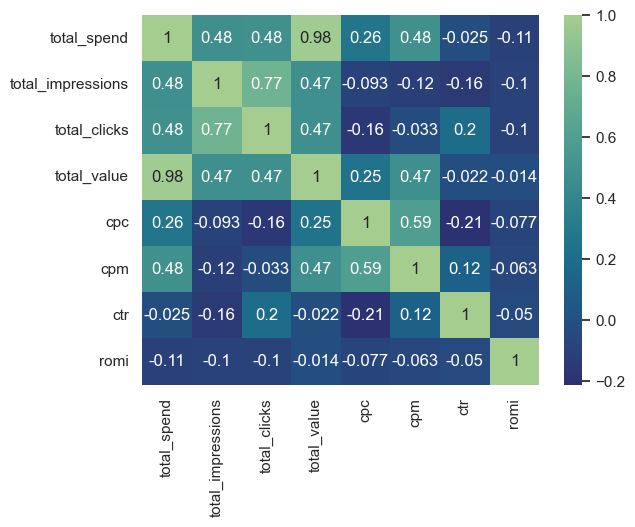

In [60]:
sns.heatmap(fb_df.corr(), cmap="crest_r", annot=True)

Найслабіша кореляція наблюдається між метриками ROMI та total_value, найсильніша кореляція між total_value та total_spend. Total_value має найсильнішу пряму кореляцію з total_spend

6. Побудуй точкову діаграму з лінійною регресією (для цього ти можеш використати функцію lmplot()), що побудована на даних з "total_spend" та "total_value" щоб візуалізувати звʼязок між цими величинами.

<Figure size 1000x500 with 0 Axes>

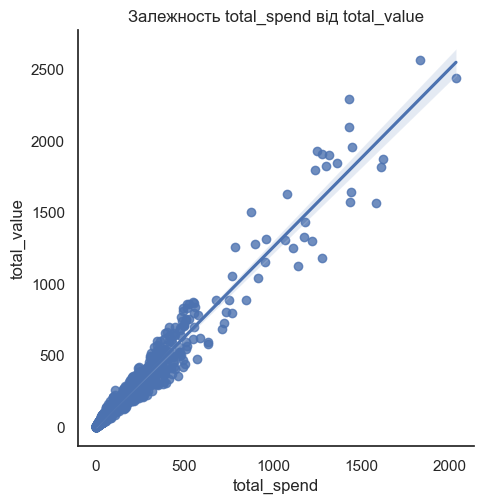

In [62]:
sns.set(style="white")
plt.figure(figsize=(10, 5))
sns.lmplot(x="total_spend", y="total_value", data=fb_df)
plt.title('Залежность total_spend від total_value')
plt.show()